In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Ridge, Lasso, LassoCV, LassoLars, LassoLarsCV, ElasticNet, ElasticNetCV, BayesianRidge, ARDRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, MinMaxScaler, MaxAbsScaler, Normalizer, StandardScaler, PowerTransformer
from sklearn.svm import SVR, NuSVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)

# -----------------------------------------------------------------------------------------------------

# Importation dataset

# -----------------------------------------------------------------------------------------------------

In [2]:
base_path = os.path.join('../input/train.csv')
base_path

'../input/train.csv'

In [3]:
df = pd.read_csv(base_path)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# -----------------------------------------------------------------------------------------------------

# Feature Understanding – What's in the Dataset?

# -----------------------------------------------------------------------------------------------------

In [7]:
df['MSSubClass'] = df['MSSubClass'].astype('str')

In [8]:
df['MoSold'] = df['MoSold'].astype('str')

In [9]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [10]:
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

In [11]:
df.set_index('Id', drop=True, inplace=True)

# -----------------------------------------------------------------------------------------------------

# Feature Improvement - Cleaning Datasets

# -----------------------------------------------------------------------------------------------------

# Check NaN:

In [12]:
for col in df.columns:
    diff = df[col].isnull().sum()
    if diff != 0:
        print('missing values for {}: {}'.format(col, diff))

missing values for LotFrontage: 259
missing values for Alley: 1369
missing values for MasVnrType: 8
missing values for MasVnrArea: 8
missing values for BsmtQual: 37
missing values for BsmtCond: 37
missing values for BsmtExposure: 38
missing values for BsmtFinType1: 37
missing values for BsmtFinType2: 38
missing values for Electrical: 1
missing values for FireplaceQu: 690
missing values for GarageType: 81
missing values for GarageYrBlt: 81
missing values for GarageFinish: 81
missing values for GarageQual: 81
missing values for GarageCond: 81
missing values for PoolQC: 1453
missing values for Fence: 1179
missing values for MiscFeature: 1406


# Fill Missing Values:

In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [14]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [15]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [16]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [17]:
fill_with_NA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
               'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in fill_with_NA:
    df[col] = df[col].fillna('NA')

In [18]:
df.isnull().sum().all()

False

# -----------------------------------------------------------------------------------------------------

# Remove outliers

# -----------------------------------------------------------------------------------------------------

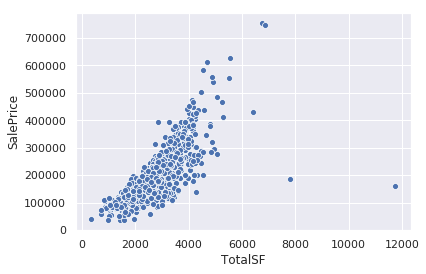

In [19]:
sns.scatterplot(x=df['TotalSF'], y=df['SalePrice']);

In [20]:
df['TotalSF'].loc[df['TotalSF'] > 6000].loc[df['SalePrice'] < 300000]

Id
524      7814
1299    11752
Name: TotalSF, dtype: int64

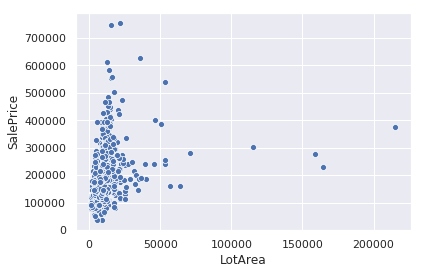

In [21]:
sns.scatterplot(x=df['LotArea'], y=df['SalePrice']);

In [22]:
df['LotArea'].loc[df['LotArea'] > 100000]

Id
250    159000
314    215245
336    164660
707    115149
Name: LotArea, dtype: int64

In [23]:
Id_to_drop = [250, 314, 336, 524, 707, 1299]

In [24]:
df.drop(Id_to_drop, inplace=True)

In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
df.shape

(1454, 82)

# EDA

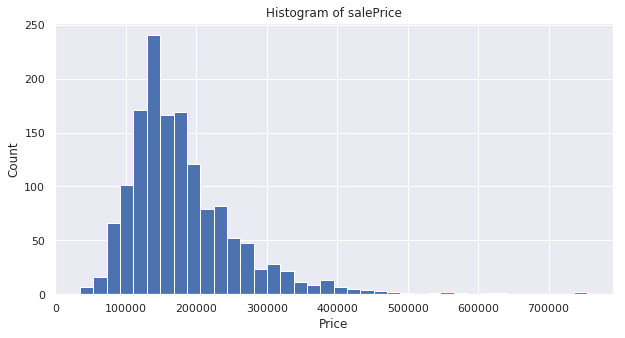

In [27]:
bins = int(np.sqrt(len(df)))

plt.figure(figsize=(10, 5))
plt.title('Histogram of salePrice')
plt.xlabel('Price')
plt.ylabel('Count')
plt.hist(df['SalePrice'], bins=bins);

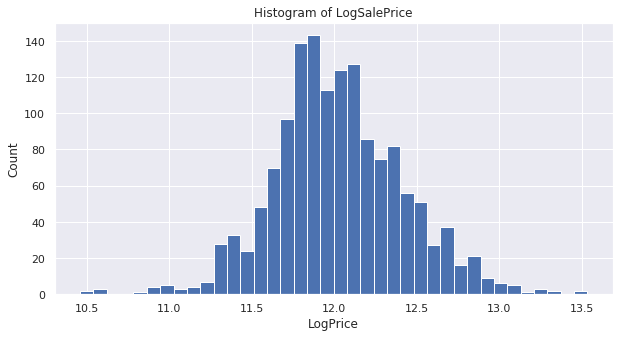

In [28]:
plt.figure(figsize=(10, 5))
plt.title('Histogram of LogSalePrice')
plt.xlabel('LogPrice')
plt.ylabel('Count')
plt.hist(np.log1p(df['SalePrice']), bins=bins);

In [29]:
df['SalePrice_log_transform'] = np.log(df['SalePrice'])

In [30]:
df.drop(labels='SalePrice', axis=1, inplace=True)

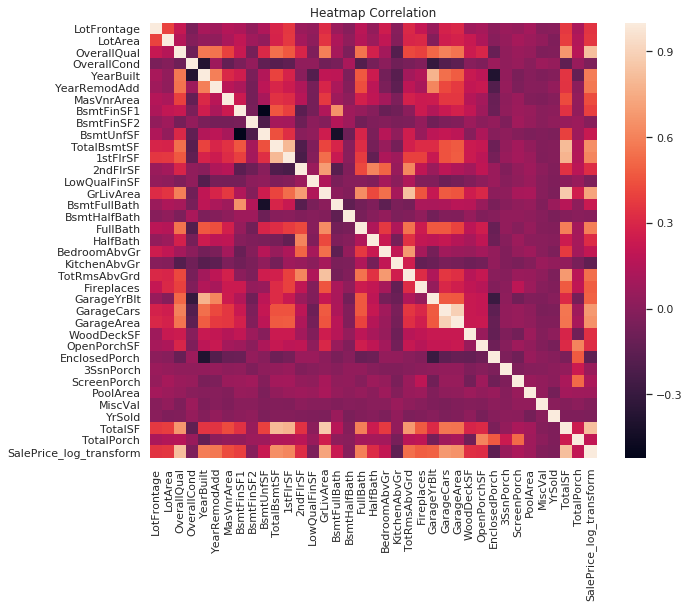

In [31]:
plt.figure(figsize=(10, 8))
plt.title('Heatmap Correlation')
sns.heatmap(df.corr());

# -----------------------------------------------------------------------------------------------------

# Feature Construction

# -----------------------------------------------------------------------------------------------------

### Dummies

In [32]:
dum_lst = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
           'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
           'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish',
           'PavedDrive', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

for dum in dum_lst:
    df = pd.concat([df, pd.get_dummies(df[dum], prefix=dum)], axis=1)

In [33]:
df.drop(labels=dum_lst, axis=1, inplace=True)

In [34]:
df.head()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,TotalSF,TotalPorch,SalePrice_log_transform,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,Reg,Lvl,Gtl,7,5,2003,2003,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,0,150,

### Categories

In [35]:
def cat_col(col, order=None):
    df[col] = df[col].astype('category', ordered=True, categories=order).cat.codes

In [36]:
cat_col('LotShape', order=['Reg', 'IR1', 'IR2', 'IR3'])

cat_col('LandContour', order=['Lvl', 'Bnk', 'HLS', 'Low'])

cat_col('LandSlope', order=['Gtl', 'Mod', 'Sev'])

cat_lst = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
           'GarageCond', 'PoolQC']
ordered_lst = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
for col in cat_lst:
    cat_col(col, order=ordered_lst)
    
cat_col('BsmtExposure', order=['Gd', 'Av', 'Mn', 'No', 'NA'])

cat_lst_2 = ['BsmtFinType1', 'BsmtFinType2']
ordered_lst_2 = ['Unknown', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
for col in cat_lst_2:
    cat_col(col, order=ordered_lst_2)

cat_col('Functional', order=['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'])

cat_col('Fence', order=['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'])

In [37]:
df.head()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,TotalSF,TotalPorch,SalePrice_log_transform,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,0,0,7,5,2003,2003,196.0,4,3,4,3,3,7,706,2,0,150,856,5,856,854,0

In [38]:
df.describe()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,TotalSF,TotalPorch,SalePrice_log_transform,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000

In [39]:
df_log = df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
              'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
              'YearRemodAdd', 'TotalSF']]

In [40]:
for col in df_log.columns:
    df_log[col + '_log'] = np.log1p(df_log[col])

In [41]:
log_lst = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
              'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
              'YearRemodAdd', 'TotalSF']

df_log.drop(labels=log_lst, axis=1, inplace=True)

In [42]:
df = pd.concat([df, df_log], axis=1)
df.drop(labels=log_lst, axis=1, inplace=True)
df.head()

,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageQual,GarageCond,PoolQC,Fence,YrSold,TotalPorch,SalePrice_log_transform,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,LowQualFinSF_log,GrLivArea_log,BsmtFullBath_log,BsmtHalfBath_log,FullBath_log,HalfBath_log,BedroomAbvGr_log,KitchenAbvGr_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_lo

# -----------------------------------------------------------------------------------------------------

# Features Selection

# -----------------------------------------------------------------------------------------------------

In [43]:
X = df.drop('SalePrice_log_transform', axis=1)
y = df['SalePrice_log_transform']

### Feature selection using Pearson correlation

In [44]:
df_corr = pd.DataFrame({
    'Pearson_corr': df.corr()['SalePrice_log_transform'].abs()}).sort_values('Pearson_corr', ascending=False)

df_corr.loc[df_corr['Pearson_corr'] > 0.2].head()

,Pearson_corr
SalePrice_log_transform,1.000000
OverallQual,0.823161
TotalSF_log,0.816937
GrLivArea_log,0.736845
ExterQual,0.685963


### Feature selection using hypothesis testing

In [46]:
k_best = SelectKBest(f_regression, k=5)

In [47]:
k_best.fit_transform(X, y)

array([[7.        , 4.        , 4.        , 7.44483327, 7.85049318],
       [6.        , 3.        , 3.        , 7.14124512, 7.83399634],
       [7.        , 4.        , 4.        , 7.48829352, 7.90359629],
       ...,
       [7.        , 5.        , 4.        , 7.75833347, 8.15851624],
       [5.        , 3.        , 4.        , 6.98378997, 7.67647365],
       [5.        , 4.        , 3.        , 7.13648321, 7.82923254]])

In [50]:
df_p_val = pd.DataFrame({
    'column': X.columns,
    'p_value': k_best.pvalues_,}, index=X.columns).sort_values('p_value')

df_p_val.drop(labels='column', axis=1, inplace=True)

In [51]:
df_p_val[df_p_val['p_value'] < .05].head(10)

,p_value
TotalSF_log,0.000000e+00
OverallQual,0.000000e+00
GrLivArea_log,3.919846e-249
ExterQual,9.640064e-203
KitchenQual,4.271917e-192
GarageCars_log,6.093384e-170
BsmtQual,1.653120e-153
1stFlrSF_log,6.250378e-151
YearBuilt,7.186526e-137
FullBath_log,1.552721e-131


### Comparison between Pearson corr & p_values

In [53]:
df_concat = pd.concat([df_corr, df_p_val], axis=1)
df_concat = df_concat.sort_values('Pearson_corr', ascending=False)
stats_sel = df_concat.loc[df_concat['Pearson_corr'] >= 0.2].loc[df_concat['p_value'] <= 0.05]
stats_sel.head(10)

,Pearson_corr,p_value
OverallQual,0.823161,0.000000e+00
TotalSF_log,0.816937,0.000000e+00
GrLivArea_log,0.736845,3.919846e-249
ExterQual,0.685963,9.640064e-203
KitchenQual,0.672590,4.271917e-192
GarageCars_log,0.642302,6.093384e-170
BsmtQual,0.617378,1.653120e-153
1stFlrSF_log,0.613254,6.250378e-151
YearBuilt,0.589629,7.186526e-137
FullBath_log,0.580126,1.552721e-131


### Using machine learning to select features

In [54]:
tree = DecisionTreeRegressor(random_state=42)

In [55]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [56]:
df_imp = pd.DataFrame({
    'importance': tree.feature_importances_,
    'feature':X.columns}, index=X.columns).sort_values('importance', ascending=False)

In [57]:
df_imp.drop(labels='feature', axis=1, inplace=True)

In [58]:
df_imp.head(10)

,importance
OverallQual,0.506048
TotalSF_log,0.258756
CentralAir_Y,0.030544
GarageCars_log,0.024049
LotArea_log,0.016559
BsmtUnfSF_log,0.013488
GrLivArea_log,0.013116
YearRemodAdd_log,0.009394
OverallCond,0.009162
BsmtFinSF1_log,0.008589


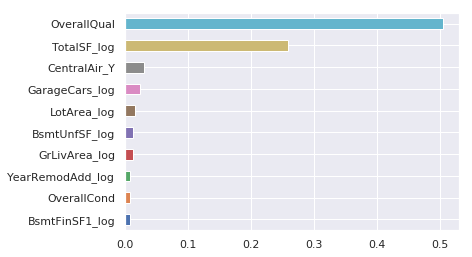

In [59]:
pd.Series(tree.feature_importances_, index=X.columns).nlargest(10).sort_values().plot(kind='barh');

### Comparison between Pearson corr & p_values & tree

In [60]:
df_concat = pd.concat([stats_sel, df_imp], axis=1)
df_concat = df_concat.sort_values('Pearson_corr', ascending=False)
stats_tree_sel = df_concat.loc[df_concat['Pearson_corr'] >= 0.2].loc[df_concat['p_value'] <= 0.05].loc[df_concat['importance'] >= 0.01]
stats_tree_sel.head(20)

,Pearson_corr,p_value,importance
OverallQual,0.823161,0.000000e+00,0.506048
TotalSF_log,0.816937,0.000000e+00,0.258756
GrLivArea_log,0.736845,3.919846e-249,0.013116
GarageCars_log,0.642302,6.093384e-170,0.024049
LotArea_log,0.399997,5.556630e-57,0.016559
CentralAir_Y,0.351657,1.419588e-43,0.030544
BsmtUnfSF_log,0.209434,7.101154e-16,0.013488


### => Feature selection doesn't improve the final score.

# -----------------------------------------------------------------------------------------------------

# Feature Transformations

# -----------------------------------------------------------------------------------------------------

In [61]:
from sklearn.decomposition import PCA

In [62]:
scaler = Normalizer()
X_rescaled = scaler.fit_transform(X)

In [63]:
pca = PCA(random_state=42).fit(X_rescaled)

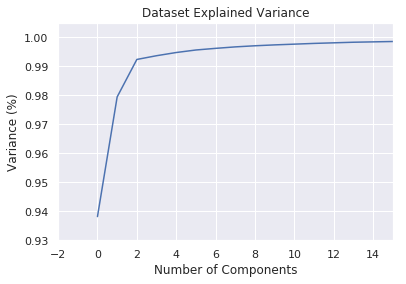

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axis([-2, 15, 0.93, 1.005])
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Dataset Explained Variance');

### 2 components represent about 99% of the data with Normalizer scaler

### => PCA doesn't improve our final score

# -----------------------------------------------------------------------------------------------------

# Machine learning

# -----------------------------------------------------------------------------------------------------

In [65]:
df['MSSubClass_150'] = 0

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [67]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1017, 254), (1017,), (437, 254), (437,))

In [68]:
pipelines = [
('AdaBoostRegressor', Pipeline([('ABR', AdaBoostRegressor(random_state=42))])),
('BaggingRegressor', Pipeline([('BR', BaggingRegressor(random_state=42))])),
('ExtraTreesRegressor', Pipeline([('ETR', ExtraTreesRegressor(random_state=42))])),
('GradientBoostingRegressor', Pipeline([('GBR', GradientBoostingRegressor(random_state=42))])),
('RandomForestRegressor', Pipeline([('RFR', RandomForestRegressor(random_state=42))])),
('Ridge', Pipeline([('R', Ridge(random_state=42))])),
('Lasso', Pipeline([('L', Lasso(random_state=42))])),
('LassoCV', Pipeline([('LCV', LassoCV(random_state=42))])),
('LassoLars', Pipeline([('LL', LassoLars())])),
('LassoLarsCV', Pipeline([('LLCV', LassoLarsCV())])),
('ElasticNet', Pipeline([('EN', ElasticNet(random_state=42))])),
('ElasticNetCV', Pipeline([('ECV', ElasticNetCV(random_state=42))])),
('BayesianRidge', Pipeline([('BR', BayesianRidge())])),
('ARDRegression', Pipeline([('ARDR', ARDRegression())])),
('KNeighborsRegressor', Pipeline([('KNR', KNeighborsRegressor())])),
('SVR', Pipeline([('SVR', SVR())])),
('NuSVR', Pipeline([('NuSVR', NuSVR())])),
('DecisionTreeRegressor', Pipeline([('DTR', DecisionTreeRegressor(random_state=42))])),
('XGBRegressor', Pipeline([('XGBR', XGBRegressor(random_state=42))])),
]

df_models_cols = ['Name', 'Train_Acc_Mean', 'Test_Acc_Mean', 'Test_Acc_3*STD']

models_comparison = pd.DataFrame(columns=df_models_cols)

In [69]:
scaler = StandardScaler()
X_train_StandardScaler = scaler.fit_transform(X_train)

In [72]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

row = 0

for name, model in pipelines:
    models_comparison.loc[row, 'Name'] = name
    cv_results = cross_validate(model, X_train_StandardScaler, y_train, cv=kf, scoring='neg_mean_squared_log_error')
    models_comparison.loc[row, 'Train_Acc_Mean'] = np.sqrt(-cv_results['train_score'].mean())
    models_comparison.loc[row, 'Test_Acc_Mean'] = np.sqrt(-cv_results['test_score'].mean())
    models_comparison.loc[row, 'Test_Acc_3*STD'] = np.sqrt(cv_results['test_score'].std() * 3)
    model.fit(X_train_StandardScaler, y_train)
    row += 1

models_comparison.sort_values(by=['Test_Acc_Mean'], inplace=True)
models_comparison

,Name,Train_Acc_Mean,Test_Acc_Mean,Test_Acc_3*STD
13,ARDRegression,0.00808322,0.00911522,0.00667226
7,LassoCV,0.0079881,0.00918155,0.00744106
11,ElasticNetCV,0.00798982,0.00918901,0.00746862
9,LassoLarsCV,0.00829387,0.00948898,0.007324
12,BayesianRidge,0.00718369,0.00955528,0.00707597
18,XGBRegressor,0.00588702,0.0100542,0.00862723
5,Ridge,0.00691938,0.010159,0.00725988
3,GradientBoostingRegressor,0.00524655,0.0103071,0.00802783
2,ExtraTreesRegressor,1.019e-06,0.0116543,0.0106486
4,RandomForestRegressor,0.00499346,0.0119522,0.0090798


In [73]:
best_model_name = models_comparison.iloc[0, 0]
Test_Acc_Mean = models_comparison.iloc[0, 2]
print('Best model: {} \nTest_Acc_Mean: {}'.format(best_model_name, Test_Acc_Mean))

Best model: ARDRegression 
Test_Acc_Mean: 0.009115218557514999


In [141]:
model = GradientBoostingRegressor(random_state=42)

In [142]:
model.fit(X_train_StandardScaler, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [143]:
X_test_StandardScaler = scaler.fit_transform(X_test)

In [144]:
y_pred = model.predict(X_test_StandardScaler)

In [145]:
mean_squared_log_error(y_test, y_pred)

0.00013476904823586002

# -----------------------------------------------------------------------------------------------------

# IMPORTATION & CLEANING DATATEST

# -----------------------------------------------------------------------------------------------------

In [134]:
base_path = os.path.join('../input/test.csv')
base_path

'../input/test.csv'

In [135]:
df_test = pd.read_csv(os.path.join(base_path))
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [136]:
for col in df_test.columns:
    diff = df_test[col].isnull().sum()
    if diff != 0:
        print('missing values for {}: {}'.format(col, diff))

missing values for MSZoning: 4
missing values for LotFrontage: 227
missing values for Alley: 1352
missing values for Utilities: 2
missing values for Exterior1st: 1
missing values for Exterior2nd: 1
missing values for MasVnrType: 16
missing values for MasVnrArea: 15
missing values for BsmtQual: 44
missing values for BsmtCond: 45
missing values for BsmtExposure: 44
missing values for BsmtFinType1: 42
missing values for BsmtFinSF1: 1
missing values for BsmtFinType2: 42
missing values for BsmtFinSF2: 1
missing values for BsmtUnfSF: 1
missing values for TotalBsmtSF: 1
missing values for BsmtFullBath: 2
missing values for BsmtHalfBath: 2
missing values for KitchenQual: 1
missing values for Functional: 2
missing values for FireplaceQu: 730
missing values for GarageType: 76
missing values for GarageYrBlt: 78
missing values for GarageFinish: 78
missing values for GarageCars: 1
missing values for GarageArea: 1
missing values for GarageQual: 78
missing values for GarageCond: 78
missing values for

In [137]:
def fill_missings_test(df):
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    df['Alley'] = df['Alley'].fillna('NA')
    df['BsmtQual'] = df['BsmtQual'].fillna('NA')
    df['BsmtCond'] = df['BsmtCond'].fillna('NA')
    df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')
    df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
    df['GarageType'] = df['GarageType'].fillna('NA')
    df['GarageFinish'] = df['GarageFinish'].fillna('NA')
    df['GarageQual'] = df['GarageQual'].fillna('NA')
    df['GarageCond'] = df['GarageCond'].fillna('NA')
    df['PoolQC'] = df['PoolQC'].fillna('NA')
    df['Fence'] = df['Fence'].fillna('NA')
    df['MiscFeature'] = df['MiscFeature'].fillna('NA')    
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0) 
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
    df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
    df['GarageCars'] = df['GarageCars'].fillna(0)
    df['GarageArea'] = df['GarageArea'].fillna(0)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    return df

In [138]:
df_test_clean = fill_missings_test(df_test)
df_test_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [140]:
def transform_df(df):
    df['MSSubClass'] = df['MSSubClass'].astype('str')
    df['MoSold'] = df['MoSold'].astype('str')
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    df.set_index('Id', drop=True, inplace=True)
    dum_lst = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
           'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
           'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish',
           'PavedDrive', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
    for dum in dum_lst:
        df = pd.concat([df, pd.get_dummies(df[dum], prefix=dum)], axis=1)
    df.drop(labels=dum_lst, axis=1, inplace=True)
    def cat_col(col, order=None):
        df[col] = df[col].astype('category', ordered=True, categories=order).cat.codes
    cat_col('LotShape', order=['Reg', 'IR1', 'IR2', 'IR3'])
    cat_col('LandContour', order=['Lvl', 'Bnk', 'HLS', 'Low'])
    cat_col('LandSlope', order=['Gtl', 'Mod', 'Sev'])
    cat_lst = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
               'GarageQual','GarageCond', 'PoolQC']
    ordered_lst = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    for col in cat_lst:
        cat_col(col, order=ordered_lst)
    cat_col('BsmtExposure', order=['Gd', 'Av', 'Mn', 'No', 'NA'])
    cat_lst_2 = ['BsmtFinType1', 'BsmtFinType2']
    ordered_lst_2 = ['Unknown', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
    for col in cat_lst_2:
        cat_col(col, order=ordered_lst_2)
    cat_col('Functional', order=['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'])
    cat_col('Fence', order=['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'])
    df_log = df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
              'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
              'YearRemodAdd', 'TotalSF']]
    for col in df_log.columns:
        df[col + '_log'] = np.log1p(df[col])
    log_lst = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
              'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
              'YearRemodAdd', 'TotalSF']
    df.drop(labels=log_lst, axis=1, inplace=True)
    return df

In [141]:
df_test_clean = transform_df(df_test_clean)

In [142]:
df_test_clean.shape

(1459, 240)

In [143]:
set(df_test_clean).difference(X_train)

{'1stFlrSF_log',
 '2ndFlrSF_log',
 '3SsnPorch_log',
 'Alley_Grvl',
 'Alley_NA',
 'Alley_Pave',
 'BedroomAbvGr_log',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1_log',
 'BsmtFinSF2_log',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath_log',
 'BsmtHalfBath_log',
 'BsmtQual',
 'CentralAir_N',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_SBrkr',
 'EnclosedPorch_log',
 'ExterCond',
 'ExterQual',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 '

In [127]:
set(X_train).difference(df_test_clean)

set()

In [128]:
for col in set(X_train).difference(df_test_clean):
    df_test_clean[col] = 0

In [129]:
df_test_clean.head()

,OverallQual,TotalSF_log,GrLivArea_log,GarageCars_log,LotArea_log,CentralAir_Y,BsmtUnfSF_log
Id,,,,,,,
1461,5,7.483807,6.799056,0.693147,9.360741,1,5.602119
1462,6,7.885705,7.192934,0.693147,9.565775,1,6.008813
1463,5,7.846981,7.396335,1.098612,9.534668,1,4.927254
1464,6,7.836370,7.380879,1.098612,9.208238,1,5.783825
1465,8,7.848153,7.155396,1.098612,8.518392,1,6.925595


In [130]:
df_test_clean.shape

(1459, 7)

In [131]:
df_test_clean = df_test_clean[X_train.columns]

In [133]:
scaler = Normalizer()
df_test_clean_rescaled = scaler.fit_transform(df_test_clean)

In [160]:
model = GradientBoostingRegressor(random_state=42)

In [161]:
model.fit(X_train_StandardScaler, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [162]:
df_test_StandardScaler = scaler.fit_transform(df_test_clean)

In [163]:
y_pred = np.exp(model.predict(df_test_StandardScaler))
y_pred

array([127758.43729674, 177253.49866523, 182102.64554514, ...,
       164751.4089392 , 107416.1073934 , 254919.64121978])

# -----------------------------------------------------------------------------------------------------

# Submission

# -----------------------------------------------------------------------------------------------------

In [164]:
df_sample_submission = pd.DataFrame({'Id': df_test_clean.index, 'SalePrice': y_pred})

In [165]:
sample_submission = pd.DataFrame.to_csv(df_sample_submission, index=False)
with open ('../submissions/sample_submission.csv', 'w') as f:
    f.write(sample_submission)

### X_train_StandardScaler & ElasticNetCV: NMSLE=7.746466255067853e-05 - SCORE=0.12508